<a href="https://colab.research.google.com/github/narc-kany/Alexa-Package/blob/main/S%26P500_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description :  Predict the future price of S&P500

**The Standard and Poor's 500** or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight') 

In [9]:
# Load the dataset
from google.colab import files
files.upload()

Saving S&P500_pred.csv to S&P500_pred.csv


{'S&P500_pred.csv': b'date,open,high,low,close,volume,Name\r\n2/8/2013,15.07,15.12,14.63,14.75,8407500,AAL\r\n2/11/2013,14.89,15.01,14.26,14.46,8882000,AAL\r\n2/12/2013,14.45,14.51,14.1,14.27,8126000,AAL\r\n2/13/2013,14.3,14.94,14.25,14.66,10259500,AAL\r\n2/14/2013,14.94,14.96,13.16,13.99,31879900,AAL\r\n2/15/2013,13.93,14.61,13.93,14.5,15628000,AAL\r\n2/19/2013,14.33,14.56,14.08,14.26,11354400,AAL\r\n2/20/2013,14.17,14.26,13.15,13.33,14725200,AAL\r\n2/21/2013,13.62,13.95,12.9,13.37,11922100,AAL\r\n2/22/2013,13.57,13.6,13.21,13.57,6071400,AAL\r\n2/25/2013,13.6,13.76,13,13.02,7186400,AAL\r\n2/26/2013,13.14,13.42,12.7,13.26,9419000,AAL\r\n2/27/2013,13.28,13.62,13.18,13.41,7390500,AAL\r\n2/28/2013,13.49,13.63,13.39,13.43,6143600,AAL\r\n3/1/2013,13.37,13.95,13.32,13.61,7376800,AAL\r\n3/4/2013,13.5,14.07,13.47,13.9,8174800,AAL\r\n3/5/2013,14.01,14.05,13.71,14.05,7676100,AAL\r\n3/6/2013,14.52,14.68,14.25,14.57,13243200,AAL\r\n3/7/2013,14.7,14.93,14.5,14.82,9125300,AAL\r\n3/8/2013,14.99,15.2,

In [10]:
# Store the data 
df = pd.read_csv('S&P500_pred.csv',  delimiter=',', header=None, skiprows=1, names=['date','open','high','low','close','volume','Name'])
# show the data
df.head()


,date,open,high,low,close,volume,Name
0,2/8/2013,15.07,15.12,14.63,14.75,8407500,AAL
1,2/11/2013,14.89,15.01,14.26,14.46,8882000,AAL
2,2/12/2013,14.45,14.51,14.10,14.27,8126000,AAL
3,2/13/2013,14.30,14.94,14.25,14.66,10259500,AAL
4,2/14/2013,14.94,14.96,13.16,13.99,31879900,AAL


In [11]:
# check the shape of the dataset
df.shape

(1259, 7)

In [12]:
# Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['date'].values))
df.head()

,date,open,high,low,close,volume,Name
2013-02-08,2/8/2013,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,2/11/2013,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,2/12/2013,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,2/13/2013,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,2/14/2013,14.94,14.96,13.16,13.99,31879900,AAL


In [13]:
df.shape

(1259, 7)

In [14]:
# Plot the LinearRegression vs close price
df2 = df.copy()
# Create a column called number range 0-len(dataset)
df2['numbers'] = list(range(0, len(df2)))
# Store the number column into a array variable
X = np.array(df2[['numbers']])
# Store the close prices as an array
Y = df2['close'].values
# Create and train the model
lin_model = LinearRegression().fit(X,Y)
print('Intercept: ', lin_model.intercept_)
print('Coefficient: ', lin_model.coef_)

Intercept:  24.510106987783196
Coefficient:  [0.02207177]


Text(0.5, 1.0, 'Close Price History')

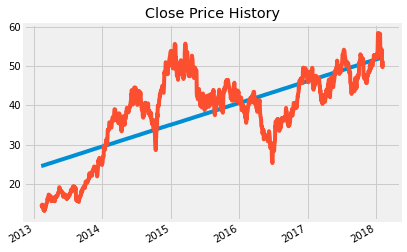

In [15]:
# Preapre the data for visualization
# Get the predicted prices from the model and calculate the slope
y_predict = lin_model.coef_ * X + lin_model.intercept_ # y = mx + C
# store in new column
df2['Predictions'] = y_predict
# Plot the vlaues
df2['Predictions'].plot()
df2['close'].plot()
plt.title('Close Price History')


In [16]:
# Verify model validity
r2_score(df2['close'], df2['Predictions'])

0.5363592218782007

In [18]:
# Verify model validity
r2_score(df2['close'], df2['Predictions'])

0.5363592218782007

In [19]:
# show models possible price
lin_model.coef_ * len(df2)+1 + lin_model.intercept_


array([53.29846931])